In [4]:

from pycocotools.coco import COCO
from pycocotools.mask import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

ModuleNotFoundError: No module named 'skimage'

In [2]:
dataDir='/media/edgar/ybuntu/aa'
annFile='{}/train_breed.json'.format(dataDir)

In [3]:
# initialize COCO api for instance annotations
coco1=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco1.loadCats(coco1.getCatIds())
nms=[cat['name'] for cat in cats]
# print('COCO 1 categories: \n{}\n'.format(' '.join(nms)))
print(nms)
# nms = set([cat['supercategory'] for cat in cats])


['big_house', 'house', 'container', 'big_building', 'road', 'building', 'house_cluster', 'building_cluster', 'etc', 'empty_soil', 'empty_paved', 'empty_etc']


In [5]:
# get all images containing given categories, select one at random
catIds = coco1.getCatIds(catNms=nms)

imgIds = coco1.getImgIds(catIds=catIds )
imgIds = coco1.getImgIds(imgIds = range(100))
# img = coco1.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco1.loadImgs(5)[0]

# img = coco1.loadImgs([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[6]

In [6]:
print(img)


{'coco_url': None, 'date_captured': '2020-12-30T00:09:24Z', 'file_name': '0_2_14.jpg', 'flickr_url': '', 'height': 995, 'id': 5, 'license': None, 'width': 1442}


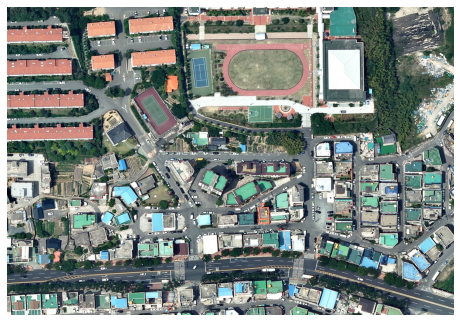

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
img_path = 'images/'
I = io.imread(img_path + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


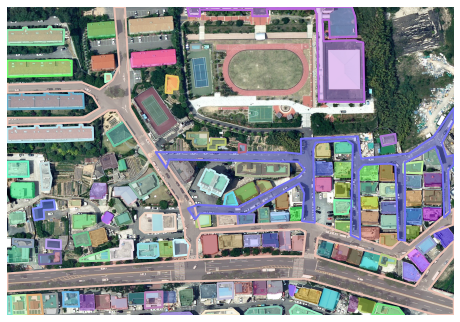

In [8]:
# load and display instance annotations
print(catIds)
plt.imshow(I); plt.axis('off')
annIds = coco1.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco1.loadAnns(annIds)
coco1.showAnns(anns)

In [14]:
mask = decode({"size": [995, 1442], "counts": "fWiP12in00[QO5`n0;I5L6K3K4M3N2N2O1L5K4N2N2N2M3M3N2O1N2O1O2N1O1N2N2O100O100O100O1O101O0O10001O000001O01O01O000000010O001000O000100O1O00100000000O00100O0010000O100O1O2O0O1O011N10O01O1O001O001O1O1O1O001O1O00001O0O2O1N2O0O2N2O1M2O2L3N3M2O2N2M2M4L4M3M4L3M5FlZ[7"})
from skimage import measure

In [25]:
contours = measure.find_contours(mask, 0.5)
len(contours[0][::200])

3

In [30]:
example = contours[0]
print(example)
# example = np.flip(example, axis=1)
# print(example)
# example = example.ravel().tolist()
# print(example)



[[ 849.5 1176. ]
 [ 849.5 1175. ]
 [ 849.5 1174. ]
 [ 849.5 1173. ]
 [ 849.5 1172. ]
 [ 849.5 1171. ]
 [ 849.5 1170. ]
 [ 849.5 1169. ]
 [ 849.5 1168. ]
 [ 849.5 1167. ]
 [ 849.5 1166. ]
 [ 849.5 1165. ]
 [ 849.5 1164. ]
 [ 849.5 1163. ]
 [ 849.5 1162. ]
 [ 849.5 1161. ]
 [ 849.5 1160. ]
 [ 849.  1159.5]
 [ 848.5 1159. ]
 [ 848.5 1158. ]
 [ 848.  1157.5]
 [ 847.5 1157. ]
 [ 847.5 1156. ]
 [ 847.5 1155. ]
 [ 847.  1154.5]
 [ 846.5 1154. ]
 [ 846.5 1153. ]
 [ 846.5 1152. ]
 [ 846.  1151.5]
 [ 845.5 1151. ]
 [ 845.5 1150. ]
 [ 845.  1149.5]
 [ 844.5 1149. ]
 [ 844.  1148.5]
 [ 843.5 1148. ]
 [ 843.5 1147. ]
 [ 843.5 1146. ]
 [ 843.  1145.5]
 [ 842.5 1145. ]
 [ 842.5 1144. ]
 [ 842.5 1143. ]
 [ 842.  1142.5]
 [ 841.5 1142. ]
 [ 841.  1141.5]
 [ 840.5 1141. ]
 [ 840.  1140.5]
 [ 839.5 1140. ]
 [ 839.  1139.5]
 [ 838.5 1139. ]
 [ 838.5 1138. ]
 [ 838.5 1137. ]
 [ 838.5 1136. ]
 [ 838.  1135.5]
 [ 837.5 1135. ]
 [ 837.5 1134. ]
 [ 837.5 1133. ]
 [ 837.  1132.5]
 [ 836.5 1132. ]
 [ 836.  1131.

In [34]:
contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
                                                        cv2.CHAIN_APPROX_SIMPLE)
    # before opencv 3.2
    # contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
    #                                                    cv2.CHAIN_APPROX_SIMPLE)
segmentation = []

for contour in contours:
    contour = contour.flatten().tolist()
    # segmentation.append(contour)
    if len(contour) > 4:
        segmentation.append(contour)


[[[1116  747]]

 [[1115  748]]

 [[1113  748]]

 [[1111  750]]

 [[1110  750]]

 [[1109  751]]

 [[1108  751]]

 [[1107  752]]

 [[1106  752]]

 [[1105  753]]

 [[1105  754]]

 [[1104  755]]

 [[1104  756]]

 [[1099  761]]

 [[1099  762]]

 [[1097  764]]

 [[1097  765]]

 [[1096  766]]

 [[1096  768]]

 [[1095  769]]

 [[1095  771]]

 [[1094  772]]

 [[1094  773]]

 [[1093  774]]

 [[1093  775]]

 [[1092  776]]

 [[1092  777]]

 [[1091  778]]

 [[1091  781]]

 [[1090  782]]

 [[1090  785]]

 [[1088  787]]

 [[1088  788]]

 [[1087  789]]

 [[1087  790]]

 [[1086  791]]

 [[1086  793]]

 [[1085  794]]

 [[1085  797]]

 [[1084  798]]

 [[1084  799]]

 [[1083  800]]

 [[1083  802]]

 [[1082  803]]

 [[1082  806]]

 [[1081  807]]

 [[1081  808]]

 [[1080  809]]

 [[1080  810]]

 [[1081  811]]

 [[1081  814]]

 [[1080  815]]

 [[1080  816]]

 [[1079  817]]

 [[1079  818]]

 [[1080  819]]

 [[1080  821]]

 [[1081  822]]

 [[1081  824]]

 [[1083  826]]

 [[1083  828]]

 [[1084  829]]

 [[1089 

In [32]:
segmentation[0]

[1116,
 747,
 1115,
 748,
 1113,
 748,
 1111,
 750,
 1110,
 750,
 1109,
 751,
 1108,
 751,
 1107,
 752,
 1106,
 752,
 1105,
 753,
 1105,
 754,
 1104,
 755,
 1104,
 756,
 1099,
 761,
 1099,
 762,
 1097,
 764,
 1097,
 765,
 1096,
 766,
 1096,
 768,
 1095,
 769,
 1095,
 771,
 1094,
 772,
 1094,
 773,
 1093,
 774,
 1093,
 775,
 1092,
 776,
 1092,
 777,
 1091,
 778,
 1091,
 781,
 1090,
 782,
 1090,
 785,
 1088,
 787,
 1088,
 788,
 1087,
 789,
 1087,
 790,
 1086,
 791,
 1086,
 793,
 1085,
 794,
 1085,
 797,
 1084,
 798,
 1084,
 799,
 1083,
 800,
 1083,
 802,
 1082,
 803,
 1082,
 806,
 1081,
 807,
 1081,
 808,
 1080,
 809,
 1080,
 810,
 1081,
 811,
 1081,
 814,
 1080,
 815,
 1080,
 816,
 1079,
 817,
 1079,
 818,
 1080,
 819,
 1080,
 821,
 1081,
 822,
 1081,
 824,
 1083,
 826,
 1083,
 828,
 1084,
 829,
 1089,
 829,
 1090,
 830,
 1100,
 830,
 1101,
 831,
 1113,
 831,
 1114,
 832,
 1117,
 832,
 1118,
 833,
 1122,
 833,
 1123,
 834,
 1128,
 834,
 1129,
 835,
 1131,
 835,
 1133,
 837,
 1135,
 837,